In [40]:
import pandas as pd
import numpy as np
import csv 
import networkx as nx
import matplotlib.pyplot as plt
#import markov_clustering as mc
import os
import sys 
from scipy.stats import hypergeom

In [106]:
intersect = pd.read_csv("intersection_interactome.tsv", sep = '\t')
G_int = nx.from_pandas_edgelist(intersect,'interactorA','interactorB')
#nx.draw(G_int, with_labels=True, width=0.2 , node_size=5, font_size=2, font_color='b')
#plt.savefig("g_int.pdf")
print(nx.info(G_int))
#nx.write_gml(G_int,'g_int.gml')

Name: 
Type: Graph
Number of nodes: 2521
Number of edges: 3261
Average degree:   2.5871


In [186]:
#seed_genes    
seed_genes_nodes = pd.read_csv("g_seednode.csv",usecols=['name'])

In [164]:
clusters_i = pd.DataFrame(columns = ['Clus1','Clus2','Clus3','Clus4'])
for z in range(1,4):
    intersection_clusters = pd.read_csv("Icluster/Icluster" + str(z)+".csv",usecols=['name'])    
    count = 0
    for i in seed_genes_nodes.index:
        curr = seed_genes_nodes.loc[i,'name']
        for j in intersection_clusters.index:
            if curr == intersection_clusters.loc[j,'name']:
                count +=1 
        clusters_i.loc['nodes','Clus'+str(z)] = j       
    clusters_i.loc['seed nodes','Clus'+str(z)] = count


In [152]:
clusters_u = pd.DataFrame(columns = ['Clus1','Clus2','Clus3','Clus4','Clus5','Clus6','Clus7','Clus8','Clus9','Clus10','Clus11','Clus12','Clus13','Clus14','Clus15','Clus16','Clus17','Clus18','Clus19'])
#clusters
for z in range(1,19): 
    union_clusters = pd.read_csv("Ucluster/Ucluster" + str(z)+".csv",usecols=['name'])    
    count = 0
    for i in seed_genes_nodes.index:
        curr = seed_genes_nodes.loc[i,'name']
        for j in union_clusters.index:
            if curr == union_clusters.loc[j,'name']:
                count +=1 
        clusters_u.loc['nodes','Clus'+str(z)] = j
    clusters_u.loc['seed nodes','Clus'+str(z)] = count
    

In [165]:
clusters_i.loc['nodes', 'Clus4']=13
clusters_i.loc['seed nodes', 'Clus4']=1


In [ ]:
clusters_u

In [175]:
for i in range(1,5):
    [M, n, N, x] = [2521, 78, clusters_i.loc['nodes','Clus'+str(i)],clusters_i.loc['seed nodes','Clus'+str(i)]]
    pval = hypergeom.sf(x,M, n, N)
    clusters_i.loc['pvalue','Clus'+str(i)] = pval

In [176]:
clusters_i

,Clus1,Clus2,Clus3,Clus4
nodes,2271.0,24.00000,16.000000,13.000000
seed nodes,46.0,1.00000,1.000000,1.000000
pvalue,1.0,0.16875,0.085731,0.059125


In [177]:
for i in range(1,20):
    [M, n, N, x] = [5612, 78, clusters_u.loc['nodes','Clus'+str(i)],clusters_u.loc['seed nodes','Clus'+str(i)]]
    pval = hypergeom.sf(x,M, n, N)
    clusters_u.loc['pvalue','Clus'+str(i)] = pval


/home/ivan/anaconda3/lib/python3.7/site-packages/scipy/stats/_discrete_distns.py:347: RuntimeWarning: invalid value encountered in maximum
  self.a = np.maximum(N-(M-n), 0)
/home/ivan/anaconda3/lib/python3.7/site-packages/scipy/stats/_discrete_distns.py:348: RuntimeWarning: invalid value encountered in minimum
  self.b = np.minimum(n, N)


In [178]:
clusters_u

,Clus1,Clus2,Clus3,Clus4,Clus5,Clus6,Clus7,Clus8,Clus9,Clus10,Clus11,Clus12,Clus13,Clus14,Clus15,Clus16,Clus17,Clus18,Clus19
nodes,4390,70,65,63,58,57,56,27,27,27,26,20,17,15,15,14,14,13,NaN
seed nodes,16,2,1,1,0,2,1,2,1,1,1,1,0,1,1,1,1,0,NaN
pvalue,1,0.07293,0.228273,0.217994,0.557787,0.0442333,0.182448,0.0059431,0.0535119,0.0535119,0.0499883,0.0308231,0.212017,0.0178118,0.0178118,0.0155759,0.0155759,0.166522,NaN


In [181]:
union_clusters = pd.read_csv("Ucluster/Ucluster6.csv",usecols=['name'])    
    #count = 0
for i in seed_genes_nodes.index:
    curr = seed_genes_nodes.loc[i,'name']
    for j in union_clusters.index:
        if curr == union_clusters.loc[j,'name']:
            print (curr)

SETD2
WWC1


In [ ]:
G_intclustered = nx.read_graphml('g_unioncluster1.graphml')
print(nx.info(G_intclustered))
list(G_intclustered)

/home/ivan/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


Name: 
Type: Graph
Number of nodes: 74
Number of edges: 175
Average degree:   4.7297



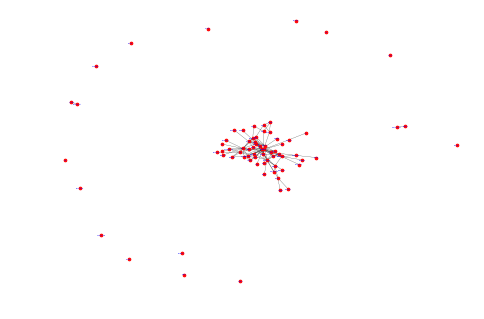

In [95]:
seed_genes = pd.read_csv("seed_genes_interactome.tsv", sep = '\t')
G_seed = nx.from_pandas_edgelist(seed_genes,'interactorA','interactorB')
nx.draw(G_seed, with_labels=True, width=0.2 , node_size=7, font_size=2, font_color='b')
plt.savefig("g_seed.pdf")
#nx.write_graphml(G_seed,'g_seed.xml')
print(nx.info(G_seed))
print(G_seed)

In [108]:
union = pd.read_csv("union_interactome_extended2.tsv", sep = '\t')
G_union = nx.from_pandas_edgelist(union,'interactorA','interactorB')
#nx.draw(G_union, with_labels=True, width=0.2 , node_size=7, font_size=2, font_color='b')
#plt.savefig("g_union.pdf")
print(nx.info(G_union))
#nx.write_graphml(G_union,'g_union.xml')
#list(nx.isolates(G_union))

Name: 
Type: Graph
Number of nodes: 5612
Number of edges: 204691
Average degree:  72.9476


In [ ]:
G_unclustered = nx.read_graphml('gunion_clustered.graphml')
print(nx.info(G_unclustered))


In [ ]:
list(G_unclustered)

In [ ]:
#nx.is_strongly_connected(G_unclustered)
G_unclustered = nx.DiGraph.to_undirected(G_unclustered)
G_fin_un = nx.Graph()
#print( 'n.of connected components:' ,nx.number_weakly_connected_components(G_unclustered))
#print('n.of connected components:', nx.number_strongly_connected_components(G_unclustered))
print('n.of connected components:', nx.number_connected_components(G_unclustered))
for g in nx.connected_component_subgraphs(G_unclustered):
    if nx.number_of_nodes(g) > 10:
        G_fin = nx.compose(G_fin,g)
#print(nx.average_shortest_path_length(g))
# print(nx.info(g))
    
#for g in nx.strongly_connected_components(G_unclustered):
  


In [ ]:
print(nx.info(G_fin))
print('n.of connected components:', nx.number_connected_components(G_fin))
    

In [ ]:
G_fin_int = nx.Graph()
G_intclustered = nx.DiGraph.to_undirected(G_intclustered)
#print( 'n.of connected components:' ,nx.number_weakly_connected_components(G_unclustered))
#print('n.of connected components:', nx.number_strongly_connected_components(G_unclustered))
print('n.of connected components:', nx.number_connected_components(G_intclustered))
for g in nx.connected_component_subgraphs(G_intclustered):
    if nx.number_of_nodes(g) > 10:
        G_fin_int = nx.compose(G_fin_int,g)

In [ ]:
print(nx.info(G_fin_int))
print('n.of connected components:', nx.number_connected_components(G_fin_int))
list_int = nx.to_edgelist(G_fin_int)
list_int
list(G_fin_int)

In [ ]:
nx.to_edgelist(G)

In [ ]:
print('n.of connected components:', nx.number_connected_components(G_int))
for g in nx.connected_component_subgraphs(G_int):
    print(nx.average_shortest_path_length(g))
    print(nx.info(g))
    
    
nx.algorithms.cluster.average_clustering(G_int)
#nx.algorithms.distance_measures.diameter(G_int)

In [ ]:
print('n.of connected components:', nx.number_connected_components(G_seed))
for g in nx.connected_component_subgraphs(G_seed):
    print(nx.info(g))
    print('avg_shrt-path : ', nx.average_shortest_path_length(g))
    print('diameter :' ,nx.algorithms.distance_measures.diameter(g))
nx.algorithms.cluster.average_clustering(G_seed)
#nx.algorithms.distance_measures.diameter(G_seed)

In [189]:
f = open("seed_file.txt","a")
for i in seed_genes_nodes.index:
    f.write(seed_genes_nodes.loc[i,'name']+'\n')
f.close()
    

In [208]:
network_file = pd.read_csv("new_biogrid.tsv", sep = '\t', usecols=['Official Symbol Interactor A','Official Symbol Interactor B'])
#net_biogrid = pd.read_csv("union_interactome_extended2.tsv", error_bad_lines=False) #,'Official Symbol Interactor B'])

In [209]:
g = open("network_file.txt","a" )
for i in network_file.index:
    g.write(network_file.loc[i,'Official Symbol Interactor A']+','+network_file.loc[i,'Official Symbol Interactor B']+'\n')